# Data Science for Business - Assignment 2
# Time Series & Seasonality: Sales Analysis
### ZHU HUIYUN

References1: Class_2

Reference2:
Matplotlib's twinx:

We used ax1.twinx() to create a second y-axis (ax2). This allows us to plot two different datasets with different scales on the same graph.
Reference for twinx https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes.twinx

Plotting with Two Different Y Axes:

A common method to display two datasets with different scales on the same graph.
Example from Matplotlib's official exampleshttps://matplotlib.org/stable/gallery/api/two_scales.html

1- Time Series starter dataset by Podsyp: https://www.kaggle.com/datasets/podsyp/time-series-starter-dataset  Uploaded under CC0 licence.






### 1-Import the training data, show the data types of the columns and check if there are non-existant values.


In [95]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
import pandas as pd

train_data = pd.read_csv('/content/drive/My Drive/Assignment_2-Train.csv' )

In [97]:
train_data.head(n=10)

,Period,Revenue,Sales_quantity,Average_cost
0,2015-01,1.601007e+07,12729,1257.763541
1,2015-02,1.580759e+07,11636,1358.507000
2,2015-03,2.204715e+07,15922,1384.697024
3,2015-04,1.881458e+07,15227,1235.606705
4,2015-05,1.402148e+07,8620,1626.621765
5,2015-06,1.678393e+07,13160,1275.374508
6,2015-07,1.916189e+07,17254,1110.576805
7,2015-08,1.520498e+07,8642,1759.428870
8,2015-09,2.060394e+07,16144,1276.259909
9,2015-10,2.099287e+07,18135,1157.588904


In [98]:
train_data.describe()

,Revenue,Sales_quantity,Average_cost
count,4.900000e+01,49.000000,49.000000
mean,2.852527e+07,17414.326531,1652.747197
std,9.598384e+06,5673.686766,288.053189
min,1.402148e+07,8314.000000,1110.576805
25%,2.099287e+07,13433.000000,1458.376602
50%,2.860159e+07,17254.000000,1620.327900
75%,3.553649e+07,19812.000000,1878.720425
max,4.767813e+07,33207.000000,2315.008323


In [99]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Period          49 non-null     object 
 1   Revenue         49 non-null     float64
 2   Sales_quantity  49 non-null     int64  
 3   Average_cost    49 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB


In [100]:
train_data.isnull().sum()

Period            0
Revenue           0
Sales_quantity    0
Average_cost      0
dtype: int64

In [101]:
df = pd.DataFrame(train_data)
print(df.dtypes)

Period             object
Revenue           float64
Sales_quantity      int64
Average_cost      float64
dtype: object


### 2- Plot Sales_quantity and Revenue with respect to months. What do you see in these two plots about the data? Describe it.

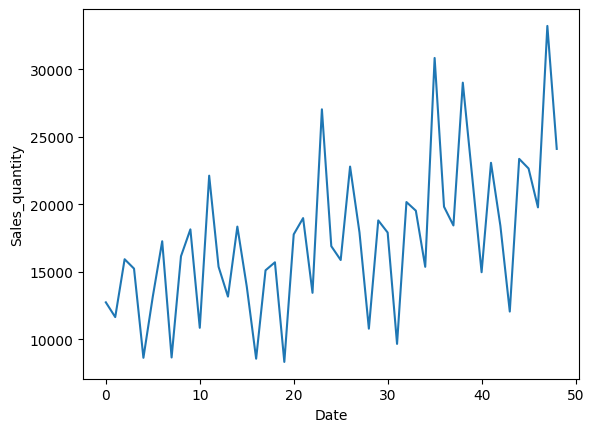

In [102]:
import matplotlib.pyplot as plt

plt.plot(train_data.Sales_quantity)

plt.xlabel('Date')
plt.ylabel('Sales_quantity')
plt.show()

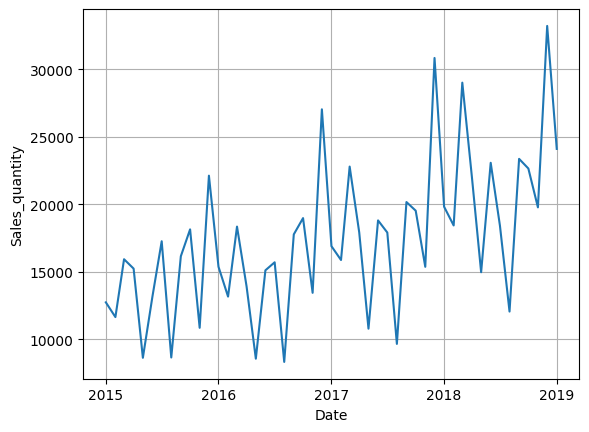

In [103]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.plot(pd.to_datetime(train_data['Period']),)
plt.xlabel('Date')
plt.ylabel('Sales_quantity')
plt.gca().xaxis.set_major_locator(mdates.YearLocator()) #optional
plt.grid()
plt.show()

At the end of the year, it is usually reach to the sales quantity peark vaule, but it reaches its downest value around in the April and June. The data continue to increase and then decrese and repeat this circule. Ovearall, it is the increase trend from 2015 to 2019.


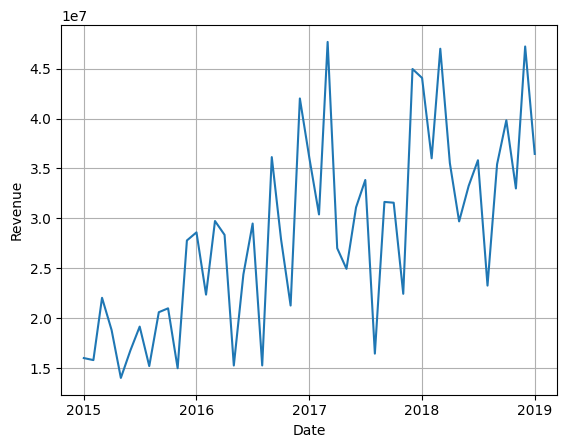

In [123]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.plot(pd.to_datetime(train_data['Period']),train_data.Revenue)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.gca().xaxis.set_major_locator(mdates.YearLocator()) #optional
plt.grid()
plt.show()

Overall.The revenue has the increas trend from 2015 to 2019, which is alige with the sales quantity. The most high revenue happens in the beginning and in the end of the year, while, the least revenue also happned almost in the middle of year.


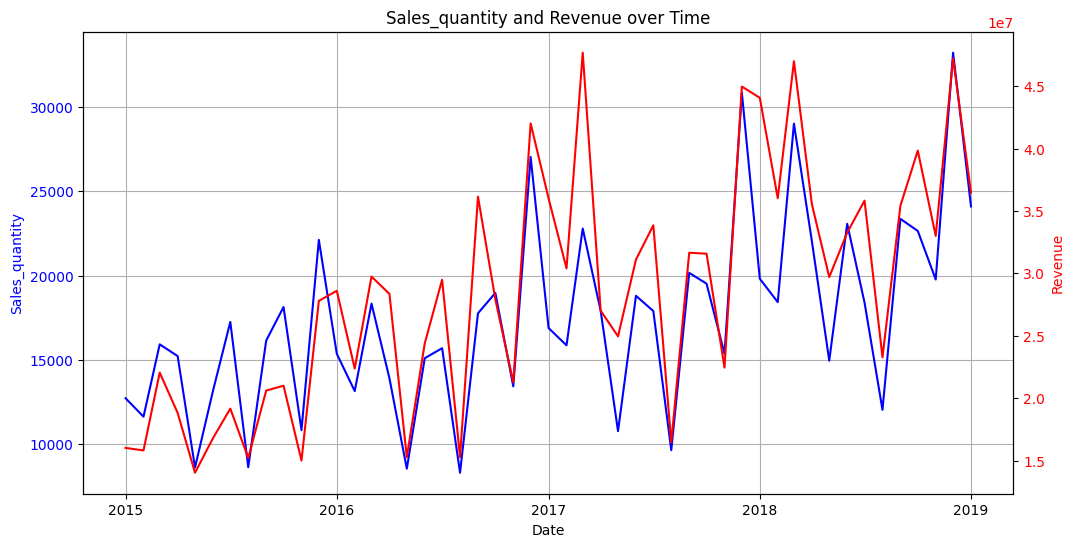

In [128]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Sales_quantity on the primary y-axis
ax1.plot(pd.to_datetime(train_data['Period']), train_data['Sales_quantity'], 'b-', label='Sales_quantity')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales_quantity', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.xaxis.set_major_locator(mdates.YearLocator())  # Set x-axis to show years
ax1.grid()

# Create a second y-axis for Revenue
ax2 = ax1.twinx()
ax2.plot(pd.to_datetime(train_data['Period']), train_data['Revenue'], 'r-', label='Revenue')
ax2.set_ylabel('Revenue', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Display the combined plot
plt.title('Sales_quantity and Revenue over Time')
plt.show()


Overall.The revenue and sales_quantity has the increas trend from 2015 to 2019, The two lines are matched to each other,as we see the higher sales quantity,
the higher revenue.



### 3- Plot the periodograms of Sale's Quantity and Revenue and select a period of seasonality for them. Afterward, decompose them with your selected periods. Do the selected methods of decomposition and seasonality periods work well?

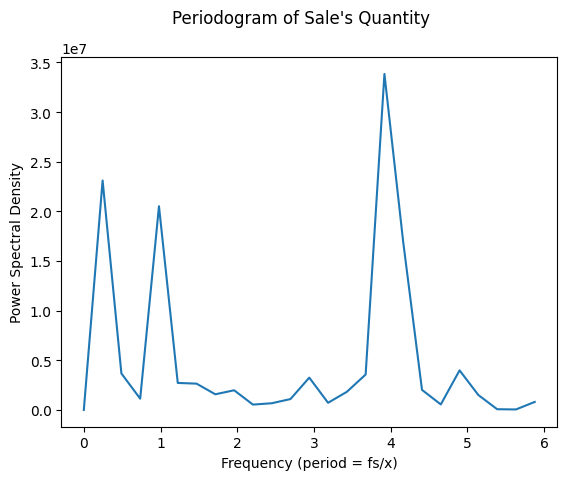

In [105]:
from scipy.signal import periodogram

freq, spectrum = periodogram(train_data.Sales_quantity, fs=12)
plt.plot(freq,spectrum)
plt.suptitle("Periodogram of Sale's Quantity")
plt.xlabel('Frequency (period = fs/x)')
plt.ylabel('Power Spectral Density')
plt.show()

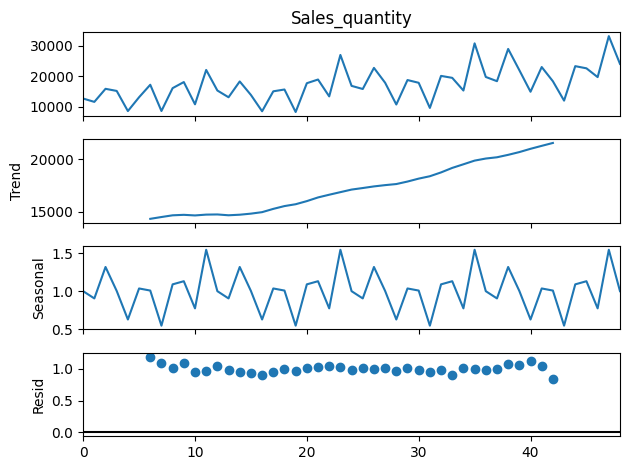

In [106]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(train_data['Sales_quantity'], model = 'multiplicative', period = 12)
fig = result.plot()

As we see in the plot, the residuals for all points are around 1, that is a good indicator in multiplicative decomposition and means that the model fits well. More importantly, there is almost no trend in the noise


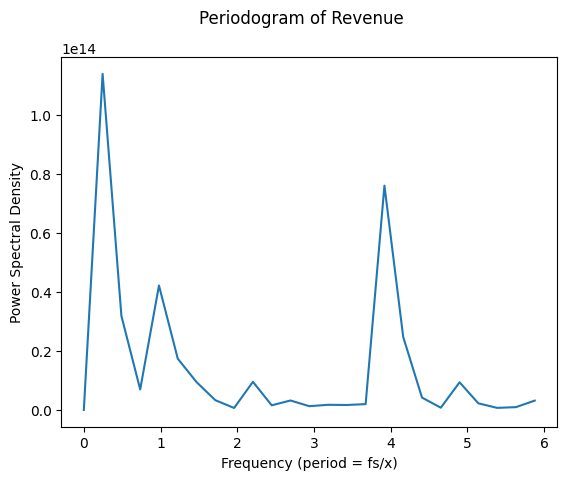

In [107]:
from scipy.signal import periodogram

freq, spectrum = periodogram(train_data.Revenue, fs=12)
plt.plot(freq,spectrum)
plt.suptitle("Periodogram of Revenue")
plt.xlabel('Frequency (period = fs/x)')
plt.ylabel('Power Spectral Density')
plt.show()

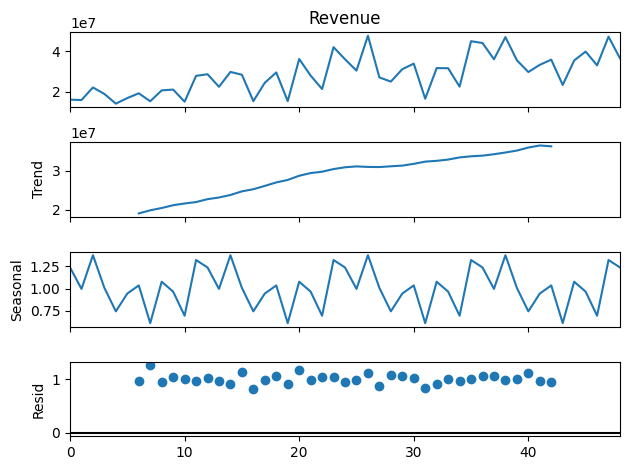

In [108]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(train_data['Revenue'], model = 'multplicative', period = 12)
fig = result.plot()

As we see in the plot, the residuals for all points are volatile, there is volatile in the noise


### 4- Fit a model on the training data of Sales_quantity and Revenue. Predict these values for the test set and the training set and show the predictions and the real values of the test set and training set in the same plot. Do they match well for each of these two indicators? For which indicator your model works better? Describe the reason. Is there a difference between the predicition accuracy of your model on the training set and the test set? What do you think is the reason?

In [109]:
!pip install prophet

In [110]:
from prophet import Prophet

model = Prophet(seasonality_mode='multiplicative')
train_df = train_data.rename(columns={"Period":"ds","Sales_quantity":"y"})
train_df['ds']= pd.to_datetime(train_df['ds'])
model.fit(train_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4olvtg4t/oqxgieom.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4olvtg4t/y_ctq8lw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20147', 'data', 'file=/tmp/tmp4olvtg4t/oqxgieom.json', 'init=/tmp/tmp4olvtg4t/y_ctq8lw.json', 'output', 'file=/tmp/tmp4olvtg4t/prophet_model6m2kq5sv/prophet_model-20231016211749.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:17:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:17:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [111]:
test_data = pd.read_csv('/content/drive/My Drive/Assignment_2-Test.csv' )
test_data.head(n=10)

,Period,Revenue,Sales_quantity,Average_cost
0,2019-02,3.654650e+07,21624,1690.089653
1,2019-03,5.419871e+07,33379,1623.736682
2,2019-04,3.274399e+07,22265,1470.648534
3,2019-05,3.253166e+07,16967,1917.348827
4,2019-06,4.770970e+07,24958,1911.599553
5,2019-07,4.599214e+07,21917,2098.468840
6,2019-08,3.693367e+07,14431,2559.328184
7,2019-09,4.852626e+07,23253,2086.881698
8,2019-10,4.416042e+07,26603,1659.978806
9,2019-11,3.637496e+07,21987,1654.384704


In [112]:
test_data.describe()

,Revenue,Sales_quantity,Average_cost
count,1.500000e+01,15.000000,15.000000
mean,4.488872e+07,25022.000000,1833.286768
std,8.622082e+06,6136.582087,292.067721
min,3.253166e+07,14431.000000,1470.648534
25%,3.674008e+07,21952.000000,1639.060693
50%,4.599214e+07,23509.000000,1711.057181
75%,5.117143e+07,26899.500000,2018.237820
max,5.875647e+07,38069.000000,2559.328184


In [113]:
test_df = test_data.rename(columns={"Period":"ds","Sales_quantity":"y"})
test_df['ds']= pd.to_datetime(test_df['ds'])

In [114]:
future = model.make_future_dataframe(20, freq='M', include_history=True)
test_predict = model.predict(future)


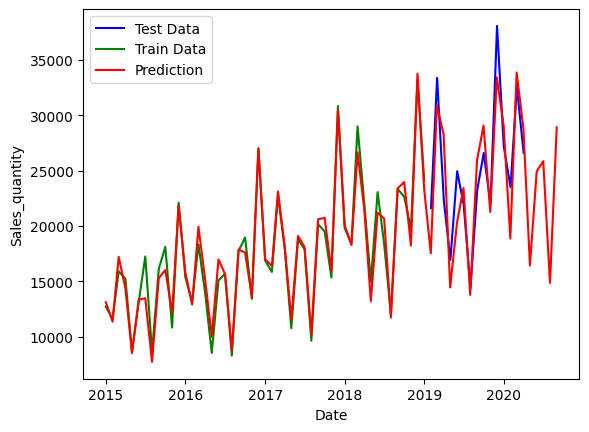

In [115]:
plt.plot(test_df.ds, test_df.y,  'b', label='Test Data')
plt.plot(train_df.ds, train_df.y,  'g' , label='Train Data')
plt.plot(test_predict.ds, test_predict.yhat,  'r', label='Prediction')
plt.xlabel('Date')
plt.ylabel('Sales_quantity')
plt.legend()
plt.show()



As we see in the results, the sales_quantity related model covers the trend and seasonal frequency well and fits well on the amplitude of seasonality


In [116]:
from prophet import Prophet

model = Prophet(seasonality_mode='multiplicative')
train_df = train_data.rename(columns={"Period":"ds","Revenue":"y"})
train_df['ds']= pd.to_datetime(train_df['ds'])
model.fit(train_df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4olvtg4t/tvpj5nd8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4olvtg4t/dl65oej2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81461', 'data', 'file=/tmp/tmp4olvtg4t/tvpj5nd8.json', 'init=/tmp/tmp4olvtg4t/dl65oej2.json', 'output', 'file=/tmp/tmp4olvtg4t/prophet_model8tvhy7bn/prophet_model-20231016211751.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:17:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:17:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [117]:
test_data = pd.read_csv('/content/drive/My Drive/Assignment_2-Test.csv' )
test_data.head(n=10)

,Period,Revenue,Sales_quantity,Average_cost
0,2019-02,3.654650e+07,21624,1690.089653
1,2019-03,5.419871e+07,33379,1623.736682
2,2019-04,3.274399e+07,22265,1470.648534
3,2019-05,3.253166e+07,16967,1917.348827
4,2019-06,4.770970e+07,24958,1911.599553
5,2019-07,4.599214e+07,21917,2098.468840
6,2019-08,3.693367e+07,14431,2559.328184
7,2019-09,4.852626e+07,23253,2086.881698
8,2019-10,4.416042e+07,26603,1659.978806
9,2019-11,3.637496e+07,21987,1654.384704


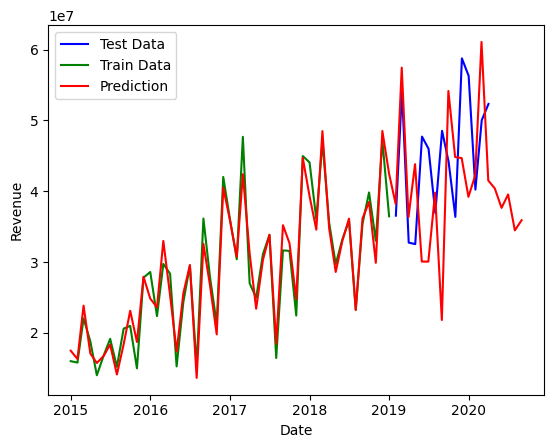

In [118]:
test_df = test_data.rename(columns={"Period":"ds","Revenue":"y"})
test_df['ds']= pd.to_datetime(test_df['ds'])
future = model.make_future_dataframe(20, freq='M', include_history=True)
test_predict = model.predict(future)
plt.plot(test_df.ds, test_df.y,  'b', label='Test Data')
plt.plot(train_df.ds, train_df.y,  'g' , label='Train Data')
plt.plot(test_predict.ds, test_predict.yhat,  'r', label='Prediction')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

As we see in the results, our model works well in modeling the trend and the amplitude of seasonality, however, it does not work well in modeling frequency of seasonality.

As these errors become higher in the end, this can be an indicator that
multiplicative decomposition does not fit well to this data, and 'additive decomposition' may be a better choice.




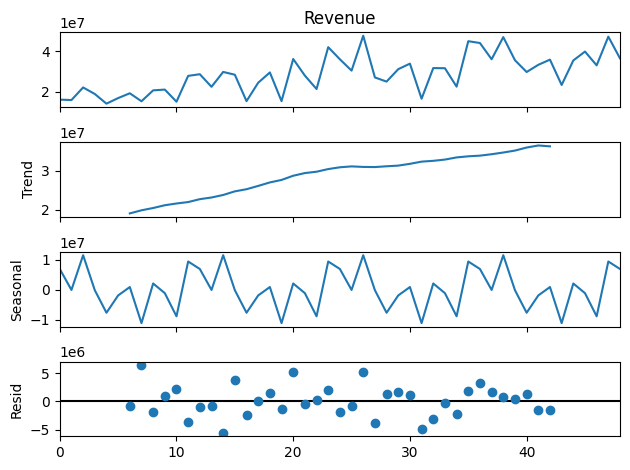

In [119]:
result = seasonal_decompose(train_data['Revenue'], model = 'addtivie', period = 12)
fig = result.plot()


In [120]:
model = Prophet(seasonality_mode='additive')
model.fit(train_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4olvtg4t/tdyxkl9j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4olvtg4t/buc3c9sy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97431', 'data', 'file=/tmp/tmp4olvtg4t/tdyxkl9j.json', 'init=/tmp/tmp4olvtg4t/buc3c9sy.json', 'output', 'file=/tmp/tmp4olvtg4t/prophet_modelcr95myt_/prophet_model-20231016211752.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:17:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:17:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


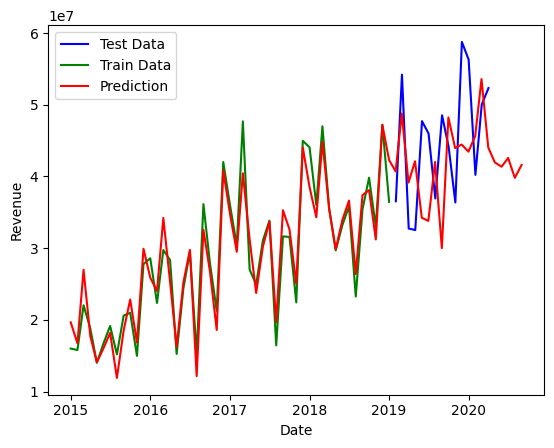

In [121]:
future = model.make_future_dataframe(20, freq='M', include_history=True)
test_predict = model.predict(future)
plt.plot(test_df.ds, test_df.y,  'b', label='Test Data')
plt.plot(train_df.ds, train_df.y,  'g' , label='Train Data')
plt.plot(test_predict.ds, test_predict.yhat,  'r', label='Prediction')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()


As we see in the results, this time the model covers the trend well,but not fits well on the amplitude of seasonality and seasonal frequency either

## Do not forget to download the IPython notebook and submit it on Moodle before October 19th midinight. Please do not forget to indicate the online sources that you used and the people that you discussed the assignment with them (if any). No sharing of the code is allowed.
